# Clustering

This is a cluster model of the top ten features Ames, Iowa dataset gathered from a linear regression. Three different approaches will be used: partitioning, hierarchical agglomerative, and model based.

### Data Preparation

In [64]:
library(caret)
library(reshape2)
library(ggplot2)
library(dplyr)
library(cluster) 
library(repr)
set.seed(100)

In [10]:
#Load Data - Refer to 01. EDA for more details
source('./src/load_data.r')
dummy <- dummyVars(" ~ .", data = ames)
ames <- data.frame(predict(dummy, newdata = ames))

Once again, we split our data into training and testing sets and are looking at the top ten variables. Because we are also looking at a clustering model, it is important to scale the data.

In [53]:
in_train <- createDataPartition(y = ames$SalePrice, p = 0.6, list = FALSE)
train <- ames[in_train,]
test <- ames[-in_train,]
train <- as.data.frame(scale(train))

top10 <- c('Bedroom.AbvGr.3','Bedroom.AbvGr.2','TotRms.AbvGrd.6','TotRms.AbvGrd.7','TotRms.AbvGrd.5','Bedroom.AbvGr.4',
           'TotRms.AbvGrd.8','TotRms.AbvGrd.4','Bedroom.AbvGr.1','TotRms.AbvGrd.9', 'SalePrice')
train_top10 <- train[top10]
head(train_top10)

,Bedroom.AbvGr.3,Bedroom.AbvGr.2,TotRms.AbvGrd.6,TotRms.AbvGrd.7,TotRms.AbvGrd.5,Bedroom.AbvGr.4,TotRms.AbvGrd.8,TotRms.AbvGrd.4,Bedroom.AbvGr.1,TotRms.AbvGrd.9,SalePrice
1,0.9072943,-0.5749972,-0.6381961,1.8480102,-0.5073108,-0.3994243,-0.3612096,-0.2669409,-0.2050917,-0.22254,0.41235450
2,-1.1015513,1.7381495,-0.6381961,-0.5408147,1.9700569,-0.3994243,-0.3612096,-0.2669409,-0.2050917,-0.22254,-0.93266371
7,-1.1015513,1.7381495,1.5660253,-0.5408147,-0.5073108,-0.3994243,-0.3612096,-0.2669409,-0.2050917,-0.22254,0.39401334
8,-1.1015513,1.7381495,-0.6381961,-0.5408147,1.9700569,-0.3994243,-0.3612096,-0.2669409,-0.2050917,-0.22254,0.12500970
9,-1.1015513,1.7381495,-0.6381961,-0.5408147,1.9700569,-0.3994243,-0.3612096,-0.2669409,-0.2050917,-0.22254,0.67524442
11,0.9072943,-0.5749972,-0.6381961,1.8480102,-0.5073108,-0.3994243,-0.3612096,-0.2669409,-0.2050917,-0.22254,-0.06573834


### Partioning

K-means clustering is the most commonly used unsupervised machine learning algorithm for partitioning. First, we must determine how many clusters are needed.

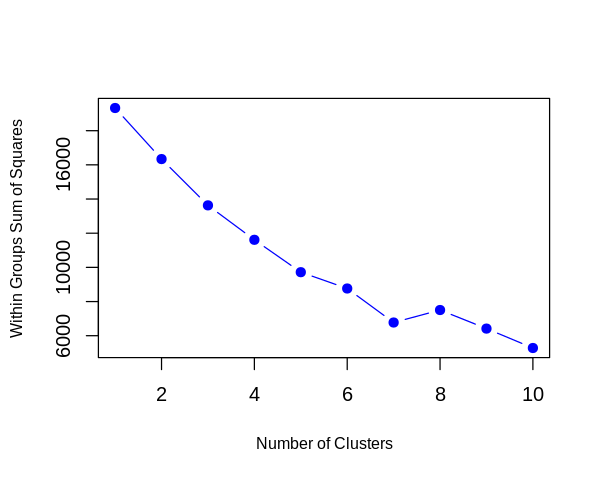

In [55]:
# Compute total within-cluster sum of square
wss <- (nrow(train_top10)-1) * sum(apply(train_top10,2,var))  

# Compute wss for for 2-10 clusters
for (i in 2:10) 
    wss[i] <- sum(kmeans(train_top10, centers=i)$withinss)

options(repr.plot.width=5, repr.plot.height=4)
plot(1:10, wss, type="b", col = "blue", pch = 19, xlab="Number of Clusters", ylab="Within Groups Sum of Squares", cex.lab = .8)

From the graph, it seems like 4 is the optimal number of clusters. Now, we fit the k-means cluster analysis.

In [72]:
# K-Means Cluster Analysis - 4 Cluster Solutions
fit <- kmeans(train_top10, 4)
aggregate(train_top10, by=list(fit$cluster), FUN=mean) #cluster means
k_means_cluster <- data.frame(train_top10, fit$cluster)

Group.1,Bedroom.AbvGr.3,Bedroom.AbvGr.2,TotRms.AbvGrd.6,TotRms.AbvGrd.7,TotRms.AbvGrd.5,Bedroom.AbvGr.4,TotRms.AbvGrd.8,TotRms.AbvGrd.4,Bedroom.AbvGr.1,TotRms.AbvGrd.9,SalePrice
1,0.4802711,-0.19431937,0.6138017,0.3928745,-0.5073108,-0.3994243,-0.3612096,-0.2669409,-0.12384072,-0.222540,0.02000793
2,-0.2548478,0.66760227,-0.6381961,-0.5408147,1.9495828,-0.3834375,-0.3612096,-0.2669409,-0.03721778,-0.222540,-0.48350173
3,-0.4885803,0.08190849,-0.6381961,-0.5408147,-0.5073108,0.3194018,1.5477884,1.1508297,0.46995417,-0.222540,0.02222777
4,-0.8783462,-0.52604175,-0.4982455,0.1669852,-0.5073108,2.0262546,-0.3446587,-0.2669409,-0.17822299,1.847435,0.79707298


ERROR: Error in library(fpc): there is no package called ‘fpc’


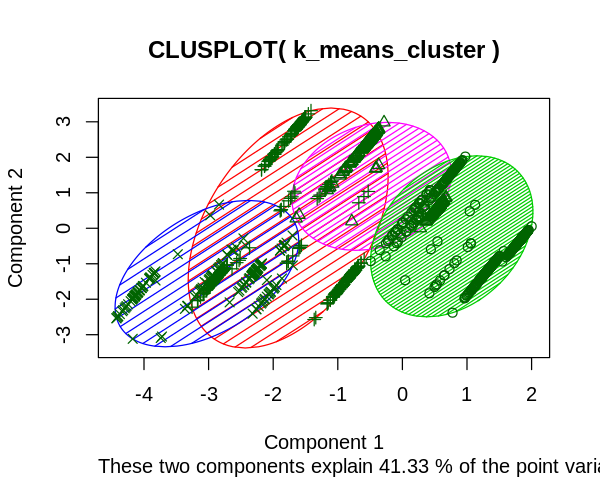

In [73]:
# Cluster Plots
clusplot(k_means_cluster, fit$cluster, color=TRUE, shade=TRUE, labels = 1, lines=0)

# Centroid Plot against 1st 2 discriminant functions
#install.packages('fpc')
library(fpc)
plotcluster(k_means_cluster, fit$cluster)

### Hierarchical Agglomerative

This uses the Ward's method for hierarchical clustering.

The "ward" method has been renamed to "ward.D"; note new "ward.D2"
Warning message in system2(cmd0, args, env = env, stdout = outfile, stderr = outfile):
“system call failed: Cannot allocate memory”Warning message in install.packages("mclust"):
“installation of package ‘mclust’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(mclust): there is no package called ‘mclust’


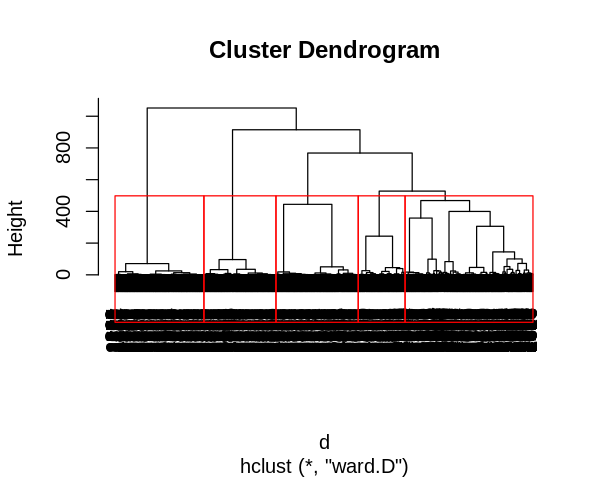

In [75]:
d <- dist(train[top10], method = "euclidean") # distance matrix
fit <- hclust(d, method="ward") 
plot(fit) # display dendogram
groups <- cutree(fit, k=5) # cut tree into 5 clusters
# draw dendogram with red borders around the 5 clusters 
rect.hclust(fit, k=5, border="red")